<a href="https://colab.research.google.com/github/muhammadficki/DataMining/blob/main/Prediksi_Harga_Mobil_Bekas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Nama : Muhammad Ficki Maulandani
## NIM  : A11.2022.14052
## Kelompok DM : A11.4507

## JUDUL : PREDIKSI HARGA MOBIL BEKAS

## DESKRIPSI :
Sistem Memprediksi Harga Mobil Merek Toyota Menggunakan Algoritma Multiple Linier Regression

Dataset Diambil Dari Kaggel

## Masalah dan Tujuan yang ingin dicapai :
Karena banyak sekali masalah yang dialami oleh calon customer yaitu terjebak oleh oknum calo yang menawarkan harga sangat tinggi, jika ingin membeli sebuah mobil bekas baik di perorangan/showroom mobil bekas.
Tujuan yang saya harapkan yaitu agar calon pembeli yang awam bisa menggunakan metode ini untuk cek harga mobil bekas secara online, agar harga mobil tidak dipermainkan oleh calo.


In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip matplotlib

ERROR: unknown command "matplotlib"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Digunakan untuk membaca Datasetnya
df = pd.read_csv('/content/drive/MyDrive/Dataset/toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


# **1. Data Understanding**

In [ ]:
# cek merk mobilnya apa saja dari atribut model
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [ ]:
df.info()
#Pakai Algoritma multiple linier regression
#syaratnya harus pakai type data int/angka
#utk type data yg masih object, float kita lakukan label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
# cek baris & kolom
df.shape
# Disini ada 6738 data & 9 atribut

(6738, 9)

# **2. Cleaning Data**

In [ ]:
# Apakah ada data yg bernilai kosong?
df.isnull().sum()
# Hasilnya tdk ada nilai kosong, lanjut next step

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [ ]:
# Apakah ada nilai yg duplicate?
df.duplicated().sum()
# Hasilnya ada 39 data yg sama, kita harus menghapus data/nilai yg sama

39

In [ ]:
# Hapus data duplicate
df = df.drop_duplicates()

In [ ]:
# cek baris & kolom setelah di cleaning
df.shape
# Hasilnya ada 6699 data & 9 atribut

(6699, 9)

# **3. Exploratory Data Analysis (EDA)**

<Axes: >

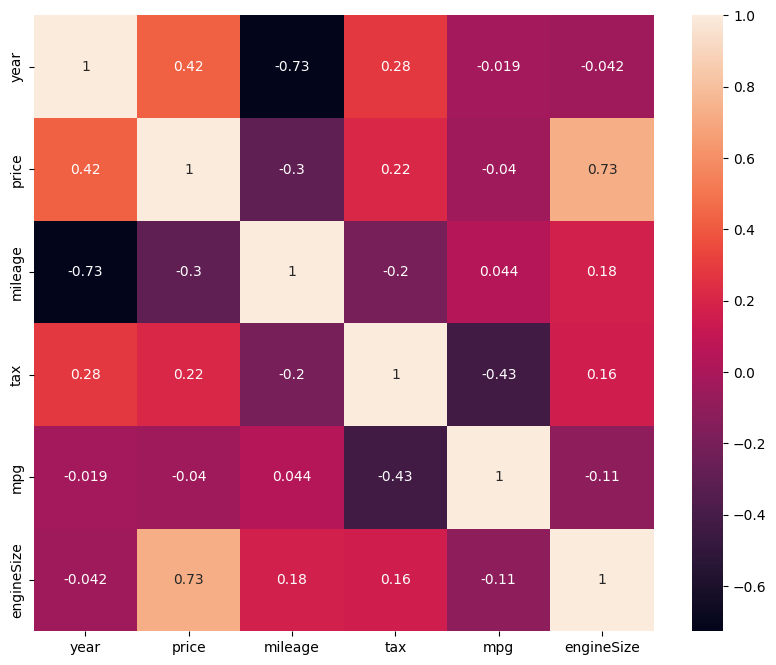

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Pilih hanya kolom numerik dari df
numeric_df = df.select_dtypes(include=['number'])

# Hitung korelasi dan buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True)
#plt.show()

# jika nilai atribut mendekati 1 maka korelari atribut semakin baik
# jika nilai atribut (- negatif) maka tdk memiliki korelasi sama sekali


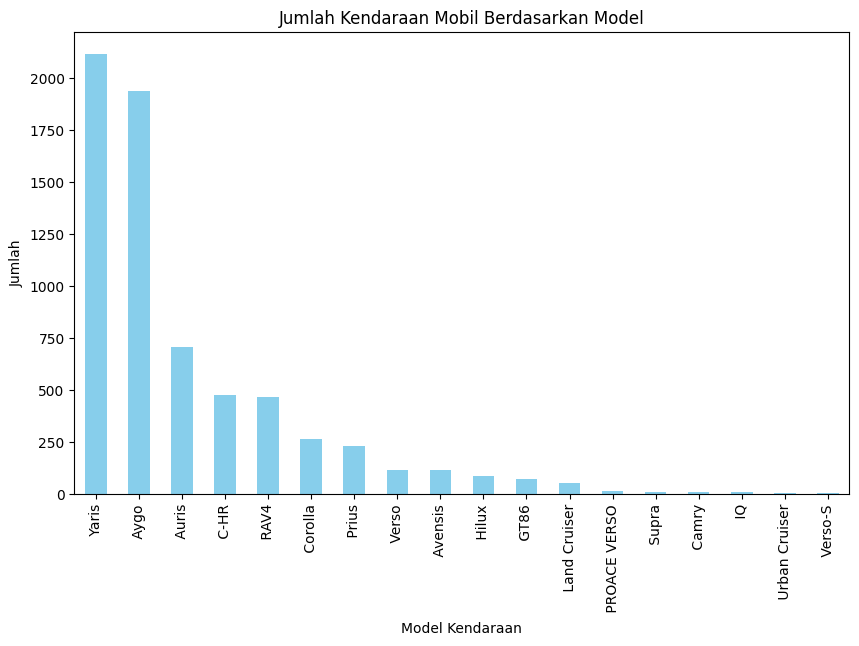

In [ ]:
# melihat jenis mobil yg terjual paling banyak dari data kita
jumlah_kendaraan = df['model'].value_counts()

plt.figure(figsize=(10, 6))
jumlah_kendaraan.plot(kind='bar', color='skyblue')
plt.xlabel('Model Kendaraan')
plt.ylabel('Jumlah')
plt.title('Jumlah Kendaraan Mobil Berdasarkan Model')
plt.show()

<ipython-input-15-adeb2e1144c5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

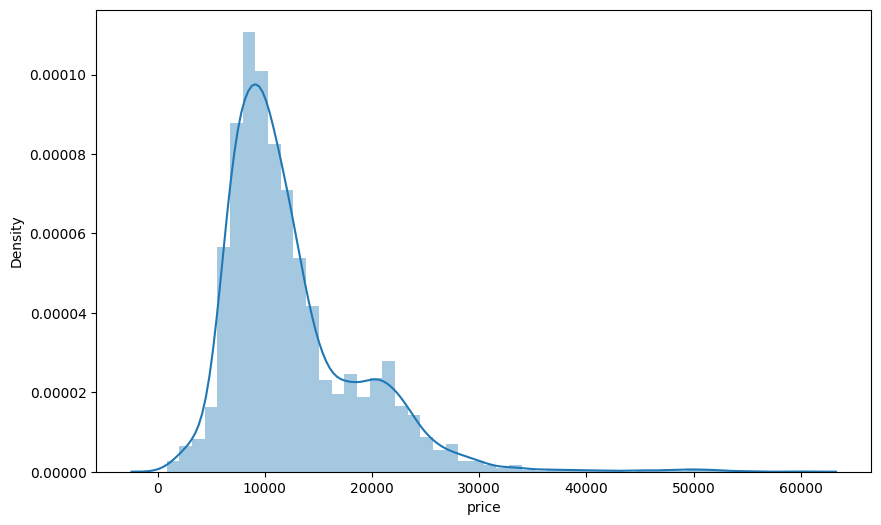

In [ ]:
# visualisasi harga mobil (euro)
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

In [ ]:
# konversi dari euro ke rupiah
nilai_tukar_euro_ke_rupiah = 16974

df['price'] = df['price'] * nilai_tukar_euro_ke_rupiah
df['tax'] = df['tax'] * nilai_tukar_euro_ke_rupiah

<ipython-input-16-713b4c9fa7bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'] * nilai_tukar_euro_ke_rupiah
<ipython-input-16-713b4c9fa7bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax'] = df['tax'] * nilai_tukar_euro_ke_rupiah


In [ ]:
# cek 5 sample
df.sample(5)
# hasilnya sudah berupa rupiah

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2029,Yaris,2018,203603130,Automatic,15432,Hybrid,2291490,76.3,1.5
2548,Yaris,2018,157858200,Manual,11554,Petrol,2461230,48.7,1.0
3186,Auris,2014,169706052,Automatic,45592,Hybrid,0,74.3,1.8
2039,Yaris,2017,186629130,Automatic,23802,Hybrid,0,86.0,1.5
222,Corolla,2019,339395130,Manual,7777,Petrol,2461230,39.2,1.2


# **4. Label Encoder = utk mengubah nilai objek menjadi angka**

In [ ]:
df.info()
# ada 3 atribut type datanya object
# harus kita ubah dulu menjadi type data int

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# ubah 3 atribut m = model
m_encoder = LabelEncoder()
t_encoder = LabelEncoder()
f_encoder = LabelEncoder()

# proses fit
df['model'] = m_encoder.fit_transform(df['model'])
df['transmission'] = t_encoder.fit_transform(df['transmission'])
df['fuelType'] = f_encoder.fit_transform(df['fuelType'])

<ipython-input-19-6d19cd0437c2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = m_encoder.fit_transform(df['model'])
<ipython-input-19-6d19cd0437c2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = t_encoder.fit_transform(df['transmission'])
<ipython-input-19-6d19cd0437c2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
df.sample(5)
# hasilnya atribut m, t, f = sudah menjadi angka

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3893,2,2018,140035500,1,7378,3,2461230,68.9,1.0
12,6,2017,288473130,1,36100,3,2461230,36.2,2.0
3410,0,2015,137489400,1,48002,0,339480,67.3,1.6
4818,2,2018,140986044,1,12597,3,2461230,68.9,1.0
495,12,2016,373258260,0,39039,1,339480,55.4,2.5


# **5. Preparation Data**

In [ ]:
# utk memisahkan data train (x) & data testing (y)
features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6699, 8), (6699,))

In [ ]:
# spliting data train & data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test.shape
# hasilnya keluar 1348 brs data yg akan dilakukan testing

(1340,)

# **6. Training & Evaluation Data**

In [ ]:
# Algoritma LinierRegression/Linier Berganda
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train, sample_weight=None)
pred = lr.predict(x_test)

In [ ]:
# cek akurasi data
score = lr.score(x_test, y_test)
print("Akurasi model Regresi Linear Berganda adalah", score)
# Akurasi yang diperoleh sudah cukup bagus yaitu 0,79

Akurasi model Regresi Linear Berganda adalah 0.7909694669627094


In [ ]:
# Evaluasi Data
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 35137626.152064756
MSE: 2493220004614705.0
RMSE: 49932154.01537075


In [ ]:
import joblib
joblib.dump(lr, 'toyota_model.pkl')

['toyota_model.pkl']

# **7. Testing**

In [ ]:

# Buat input data
input_data = {
    'model': ' Corolla',
    'year': 2016,
    'transmission': 'Manual',
    'mileage': 1401,
    'fuelType': 'Petrol',
    'tax': 2385180,
    'mpg': 76.3,
    'engineSize': 1.5
}

input_df = pd.DataFrame([input_data])



input_df['model'] = m_encoder.transform(input_df['model'])
input_df['transmission'] = t_encoder.transform(input_df['transmission'])
input_df['fuelType'] = f_encoder.transform(input_df['fuelType'])

input_df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2016,1,1401,3,2385180,76.3,1.5


In [ ]:
prediction = lr.predict(input_df)
prediction_formatted = round(prediction[0], 2)

print("Prediksi Harga Mobil - Rp. ", prediction_formatted)


Prediksi Harga Mobil - Rp.  241724560.85


## TESTING LOAD MODEL

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

# Muat model yang disimpan
loaded_model = joblib.load('toyota_model.pkl')

# Load label encoders (assuming they were saved separately or are available)
m_encoder = LabelEncoder()
t_encoder = LabelEncoder()
f_encoder = LabelEncoder()

In [ ]:
# Buat input data
input_data = {
    'model': ' Corolla',
    'year': 2016,
    'transmission': 'Manual',
    'mileage': 1401,
    'fuelType': 'Petrol',
    'tax': 2385180,
    'mpg': 76.3,
    'engineSize': 1.5
}

input_df = pd.DataFrame([input_data])

# Apply label encoding to the input data
input_df['model'] = m_encoder.fit_transform(input_df['model'])
input_df['transmission'] = t_encoder.fit_transform(input_df['transmission'])
input_df['fuelType'] = f_encoder.fit_transform(input_df['fuelType'])

# Make the prediction
prediction = loaded_model.predict(input_df)
prediction_formatted = round(prediction[0], 2)

print("Prediksi Harga Mobil - Rp. ", prediction_formatted)

Prediksi Harga Mobil - Rp.  262154363.04


## STREAMLIT


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255314 sha256=c819b0b4c29c3d34200e01f7b39983d2bc5946bae676edcd6596b85540f2a04c
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


# KESIMPULAN :

Model prediksi harga mobil bekas menggunakan algoritma Multiple Linear Regression berhasil mencapai akurasi sebesar 79%, menunjukkan kemampuan model yang cukup baik dalam memprediksi harga berdasarkan fitur-fitur seperti model, tahun produksi, transmisi, jarak tempuh, jenis bahan bakar, pajak, efisiensi bahan bakar (mpg), dan ukuran mesin. Evaluasi menggunakan metrik MAE, MSE, dan RMSE menunjukkan tingkat kesalahan yang wajar, menandakan bahwa model ini dapat diandalkan untuk membantu calon pembeli memverifikasi harga mobil bekas. Dengan sistem ini, diharapkan calon pembeli dapat menghindari manipulasi harga oleh calo dan membuat keputusan yang lebih informasional dalam membeli mobil bekas.